In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Desktop/Amozon Dataset/Top 50 Animation Movies and TV Shows.csv")

In [38]:
df.head()

,Ranking,Name,Year,Minutes,genre,Rating,Votes
0,1.0,Big Mouth,(2017– ),30 min,"Animation, Comedy, Romance",7.9,"79,301"
1,2.0,The Bad Guys,(2022),100 min,"Animation, Adventure, Comedy",6.8,"37,335"
2,3.0,Chainsaw Man,(2022– ),NaN,"Animation, Action, Adventure",8.8,"10,613"
3,4.0,Rick and Morty,(2013– ),23 min,"Animation, Adventure, Comedy",9.1,"515,315"
4,5.0,Disenchanted,(2022),NaN,"Animation, Adventure, Comedy",NaN,NaN


In [39]:
df["Year"].unique()

array(['(2017– )', '(2022)', '(2022– )', '(2013– )', '(1999– )',
       '(1989– )', '(2018– )', '(2013–2023)', '(II) (2022)', '(2015– )',
       '(2021)', '(2016– )', '(2014–2020)', '(2021– )', '(2011– )',
       '(2016)', '(2007)', '(1997– )', '(1993)', '(2008–2020)',
       '(2019– )', '(2023)', '(2005–2008)', '(1992–1995)', '(2009– )',
       '(2004–2012)', '(I) (2017)', '(2005– )', '(1999–2023)', '(1994)'],
      dtype=object)

In [40]:
df["Year"] = df["Year"].str[1:5]

In [41]:
df["Year"].value_counts()

2022    15
2021     4
2016     4
1999     3
2013     2
2018     2
2005     2
2019     2
2017     1
2008     1
I) (     1
2004     1
2009     1
1992     1
2023     1
2007     1
1993     1
1997     1
2011     1
2014     1
2015     1
II)      1
1989     1
1994     1
Name: Year, dtype: int64

In [42]:
df["Year"] = df["Year"].str.replace("I","2017")
df["Year"] = df["Year"].str.replace("II","2017")


In [43]:
df["Year"] = df["Year"].str[0:4]

In [44]:
df["Minutes"] = df["Minutes"].str.replace(" min","")

In [45]:
df["Votes"] = df["Votes"].str.replace(",","")

In [46]:
df["genre"] = df["genre"].str.replace("Animation, ","")

In [47]:
df.dtypes

Ranking    float64
Name        object
Year        object
Minutes     object
genre       object
Rating     float64
Votes       object
dtype: object

In [48]:
df["Minutes"] = df["Minutes"].astype("float64")

In [49]:
df["Year"] = df["Year"].astype("int64")

In [50]:
df["Votes"] = df["Votes"].astype("float64")

In [51]:
df.isnull().sum()

Ranking    0
Name       0
Year       0
Minutes    4
genre      0
Rating     3
Votes      3
dtype: int64

In [52]:
df["Minutes"] = df["Minutes"].fillna(df["Minutes"].mode()[0])

In [53]:
df["Votes"] = df["Votes"].fillna(df["Votes"].mode()[0])

In [54]:
df["Rating"] = df["Rating"].fillna(df["Rating"].median())

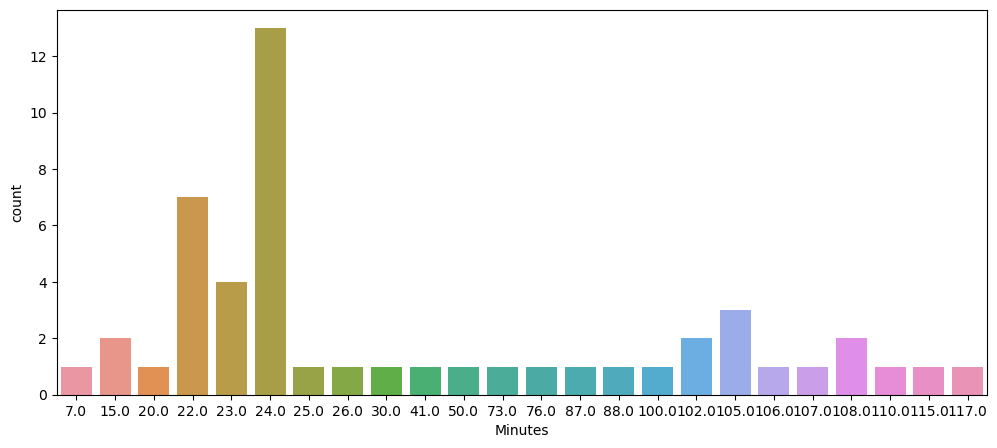

In [55]:
# plot minute and movie count
plt.figure(figsize = (12,5))
sns.countplot(x = df["Minutes"])
plt.show()

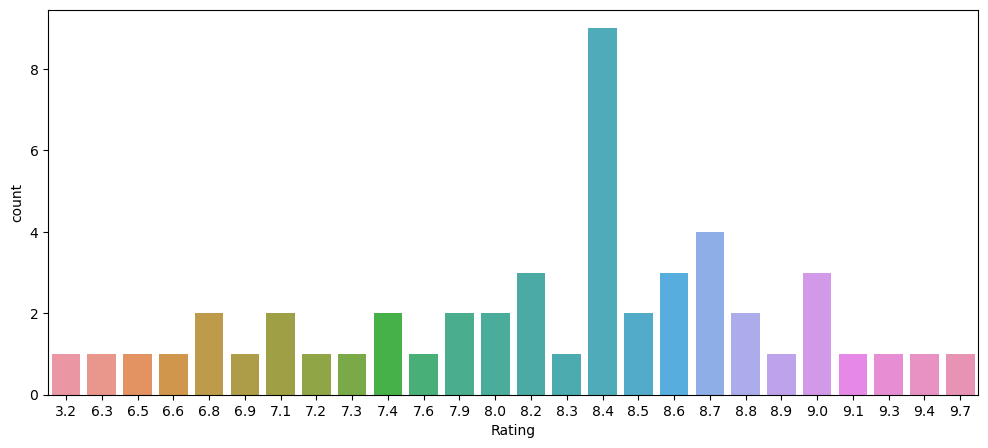

In [56]:
# plot rating and movie count
plt.figure(figsize = (12,5))
sns.countplot(x = df["Rating"])
plt.show()

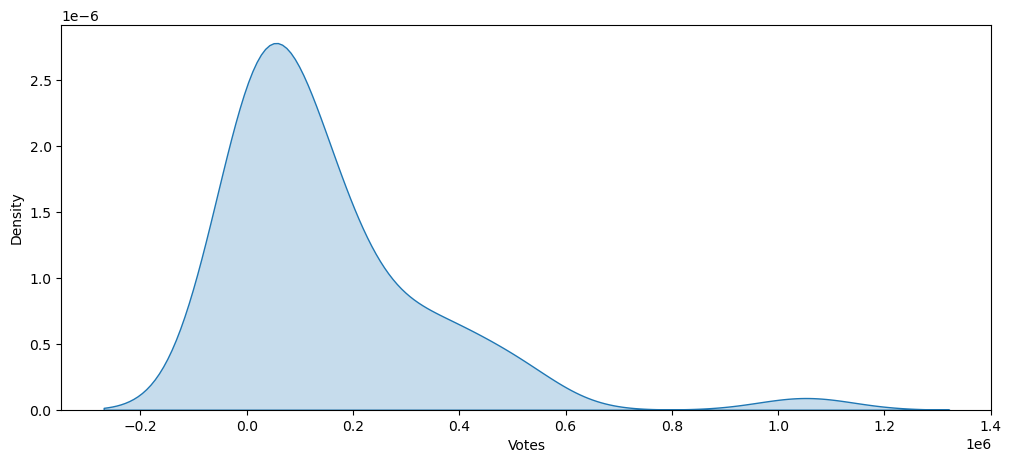

In [57]:
plt.figure(figsize = (12,5))
sns.kdeplot(x = df["Votes"] , fill = True)
plt.show()

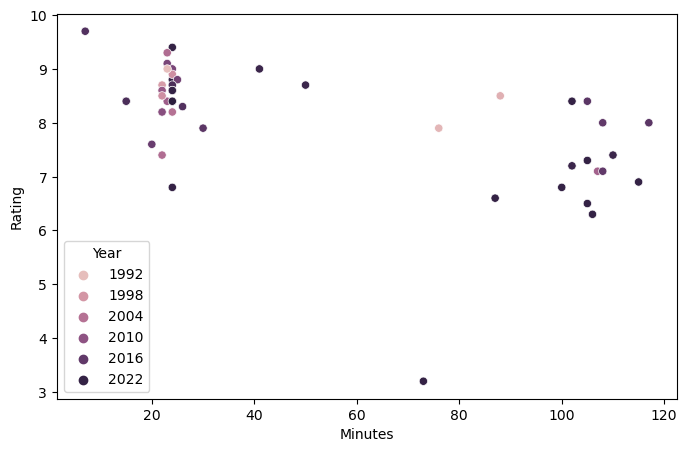

In [58]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = df["Minutes"] , y = df["Rating"] , hue = df["Year"])
plt.show()

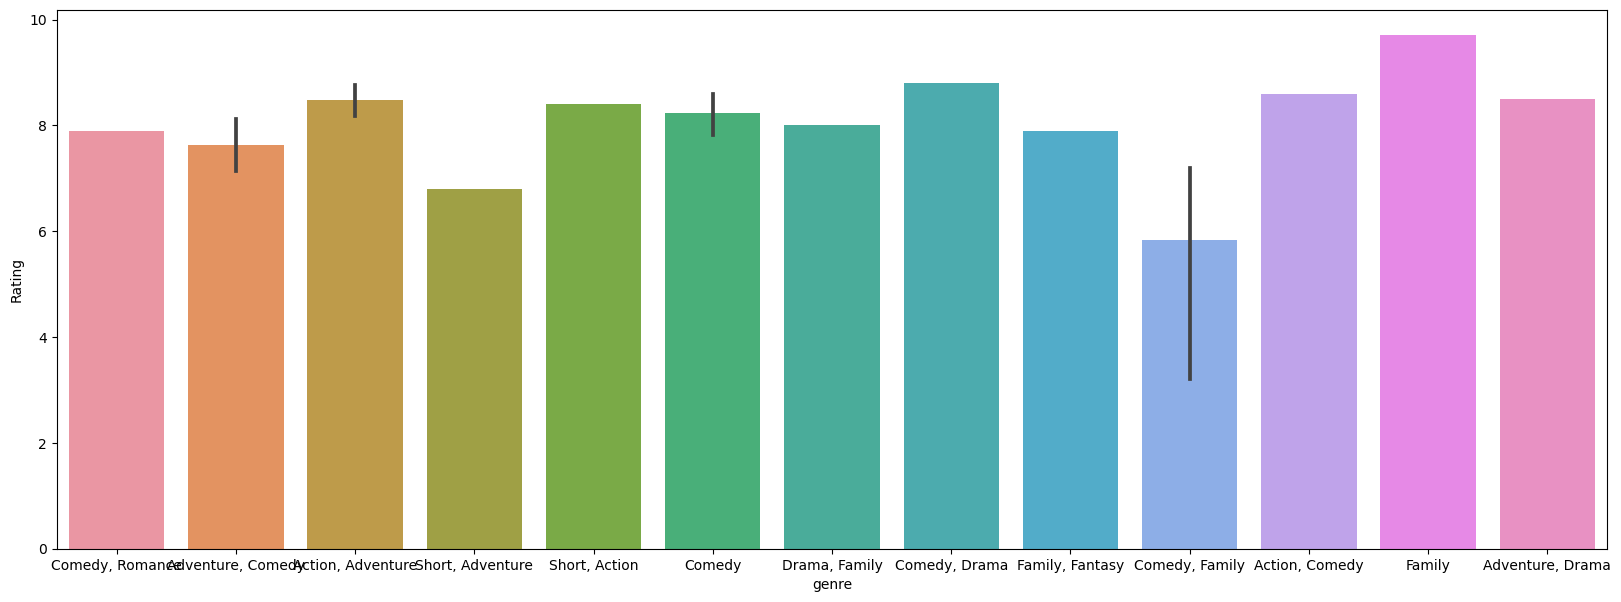

In [59]:
# genere vs avg rating
plt.figure(figsize = (20,7))
sns.barplot(x = df["genre"] , y = df["Rating"])
plt.show()

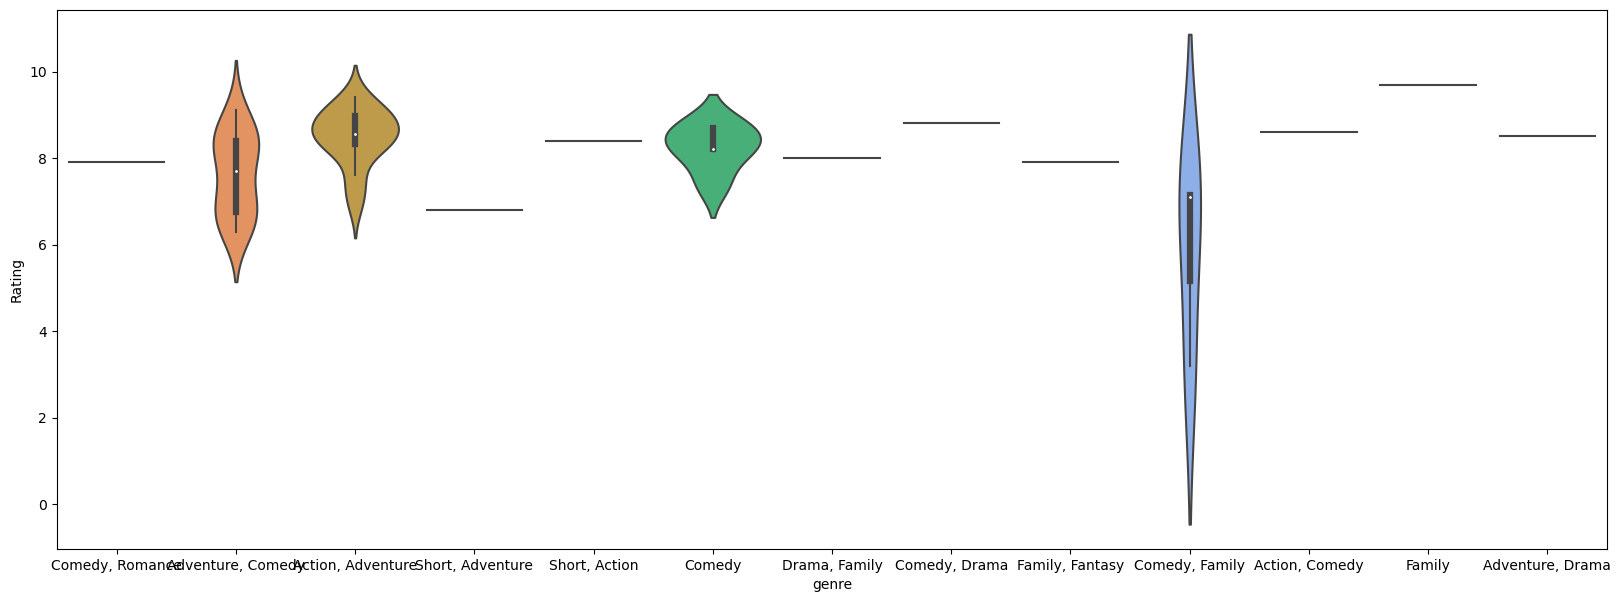

In [60]:
# genere vs avg rating
plt.figure(figsize = (20,7))
sns.violinplot(x = df["genre"] , y = df["Rating"])
plt.show()

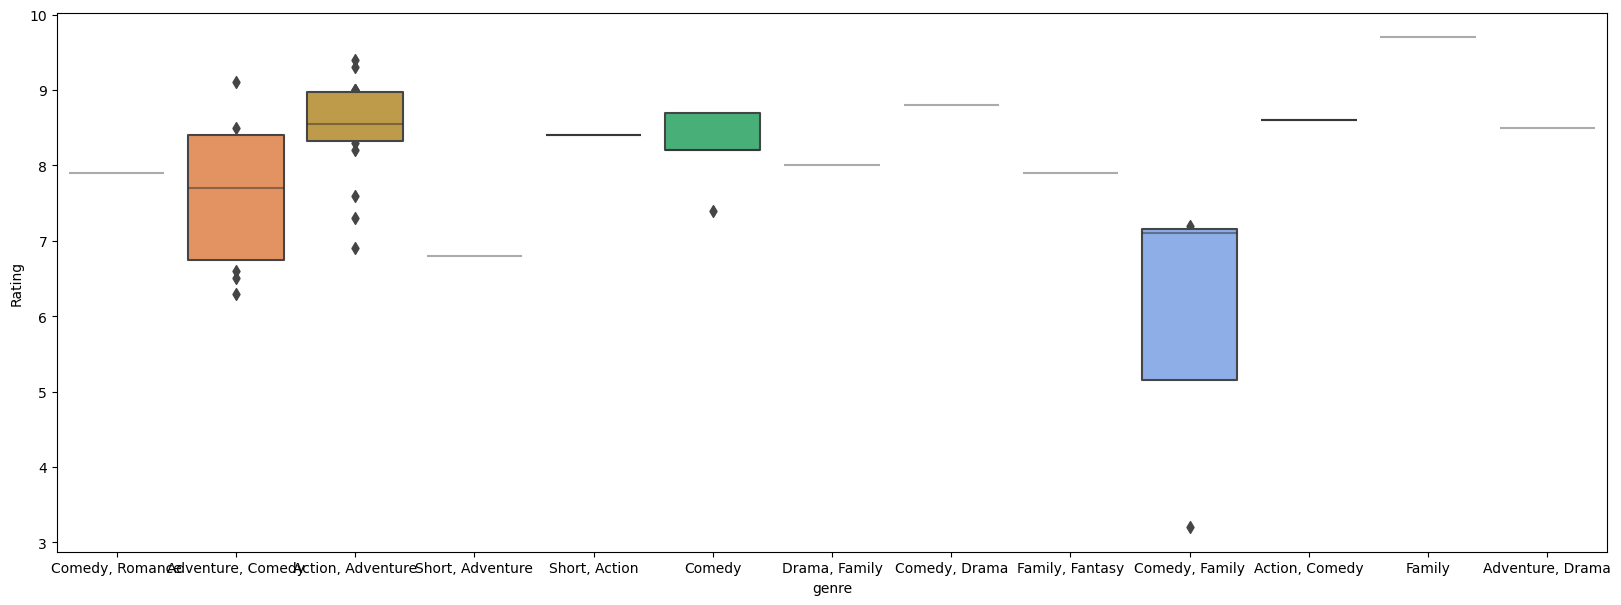

In [61]:
plt.figure(figsize = (20,7))
sns.boxenplot(x = df["genre"] , y = df["Rating"])
plt.show()

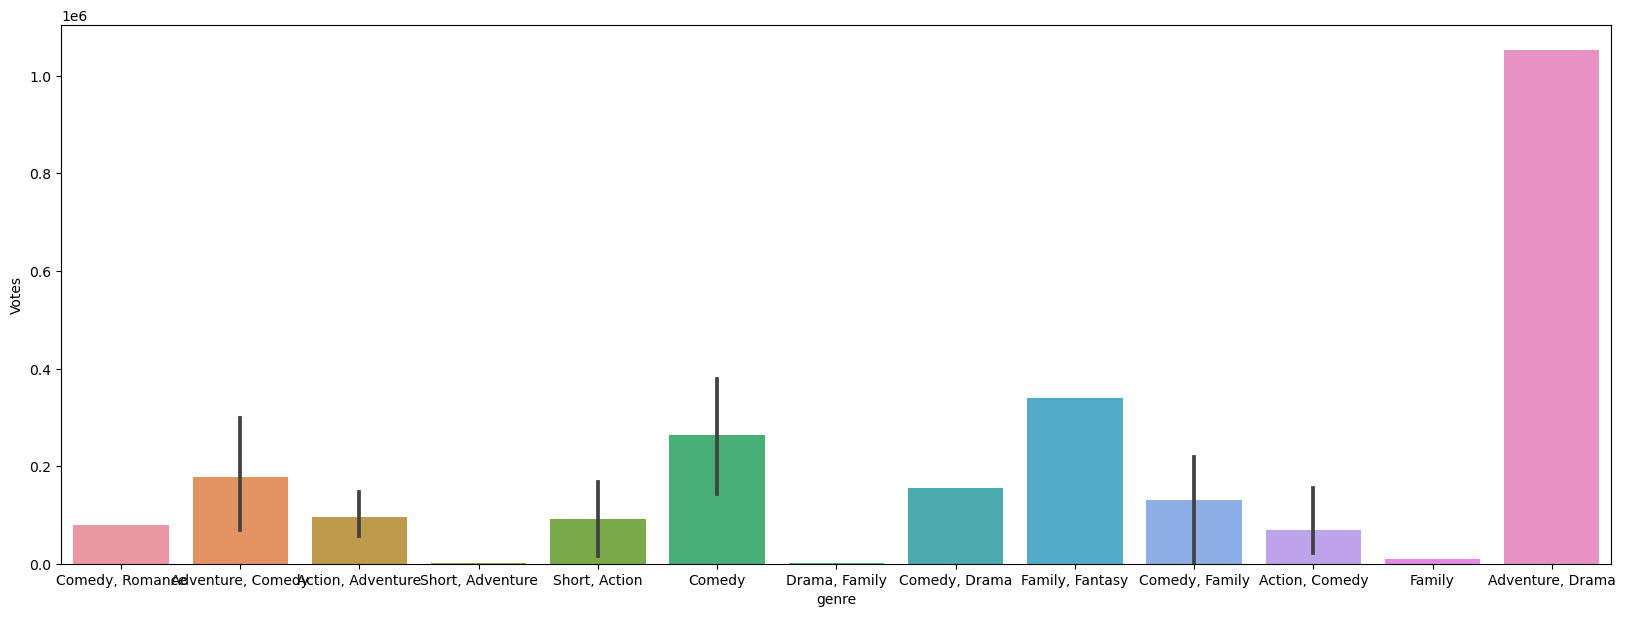

In [62]:
# genere vs avg votes
plt.figure(figsize = (20,7))
sns.barplot(x = df["genre"] , y = df["Votes"])
plt.show()

In [63]:
# highest rated movie each year

In [65]:

X = df.groupby(["Year"])["Rating"].max().reset_index()

In [72]:
df1 = pd.merge(X,df,how = "inner" , on = "Rating")

In [75]:
df1[df1["Year_x"]==df1["Year_y"]][["Year_x","Name","Rating"]].sort_values(by = "Year_x")

,Year_x,Name,Rating
0,1989,The Simpsons,8.7
14,1992,Batman: The Animated Series,9.0
19,1993,The Nightmare Before Christmas,7.9
21,1994,The Lion King,8.5
5,1997,South Park,8.7
22,1999,One Piece,8.9
25,2004,Bleach,8.2
29,2005,Avatar: The Last Airbender,9.3
30,2007,Enchanted,7.1
37,2008,Star Wars: The Clone Wars,8.4


In [80]:
# corelation betwwen minute and rating
df.corr()[["Minutes"]].loc["Rating"]

Minutes   -0.551859
Name: Rating, dtype: float64

,Ranking,Name,Year,Minutes,genre,Rating,Votes
0,1.0,Big Mouth,2017,30.0,"Comedy, Romance",7.9,79301.0
1,2.0,The Bad Guys,2022,100.0,"Adventure, Comedy",6.8,37335.0
2,3.0,Chainsaw Man,2022,24.0,"Action, Adventure",8.8,10613.0
3,4.0,Rick and Morty,2013,23.0,"Adventure, Comedy",9.1,515315.0
4,5.0,Disenchanted,2022,24.0,"Adventure, Comedy",8.4,355.0
5,6.0,Zootopia+,2022,24.0,"Short, Adventure",6.8,1232.0
6,7.0,Star Wars: Tales of the Jedi,2022,15.0,"Short, Action",8.4,15691.0
7,8.0,One Piece Film: Red,2022,115.0,"Action, Adventure",6.9,6269.0
8,9.0,Family Guy,1999,22.0,Comedy,8.2,338447.0
9,10.0,Wendell & Wild,2022,105.0,"Adventure, Comedy",6.5,5759.0
